# Build CNN Model

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
#from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
import keras
from keras.models import load_model

In [2]:
batchsize = 8

TRAINING_DIR = 'Train'
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, horizontal_flip=True, validation_split=0.1)

train_data = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size = batchsize,
                                                   class_mode = 'binary',
                                                   target_size = (80, 80), subset='training')
VALIDATION_DIR = 'Train'
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

validation_data = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size = batchsize,
                                                             class_mode = 'binary',
                                                             target_size = (80, 80), subset='validation')

TEST_DIR = 'Test'
test_datagen = ImageDataGenerator(rescale = 1.0/255)

test_data = test_datagen.flow_from_directory(TEST_DIR, target_size=(80,80), class_mode='binary', batch_size=batchsize)

Found 61128 images belonging to 2 classes.
Found 6791 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(50, (3,3), activation = 'relu', input_shape = (80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(50, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

METRICS = [
    BinaryAccuracy(name='Accuracy'),
    Precision(name='Precision'),
    Recall(name='Recall')
]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [40]:
train_y = train_data.classes
val_y = validation_data.classes
test_y = test_data.classes

Distribution of Train Data
1    30926
0    30202
dtype: int64


<AxesSubplot:>

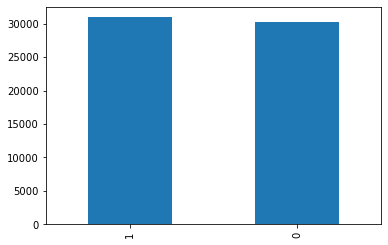

In [41]:
import pandas as pd

print("Distribution of Train Data")
print(pd.Series(train_y).value_counts())
pd.Series(train_y).value_counts().plot(kind='bar')

Distribution of Validation Data
1    3436
0    3355
dtype: int64


<AxesSubplot:>

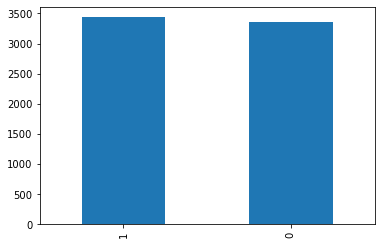

In [42]:
print("Distribution of Validation Data")
print(pd.Series(val_y).value_counts())
pd.Series(val_y).value_counts().plot(kind='bar')

Distribution of Test Data
1    8590
0    8389
dtype: int64


<AxesSubplot:>

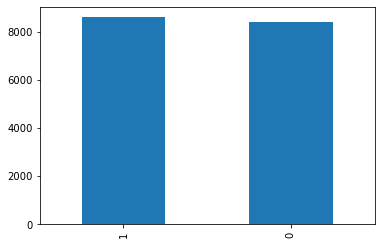

In [43]:
print("Distribution of Test Data")
print(pd.Series(test_y).value_counts())
pd.Series(test_y).value_counts().plot(kind='bar')

We can see that data for each subset is balance

In [44]:
test_data.class_indices

{'closed': 0, 'open': 1}

In [45]:
checkpoint = ModelCheckpoint(r'C:\Sistem_Monitoring_Mahasiswa_App\model_checkpoints\models.h5',
                            monitor='val_Accuracy',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_Accuracy', patience=3, verbose=1, restore_best_weights=True, mode='max')

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=1, verbose=1)

callbacks=[checkpoint,earlystop,learning_rate]

In [46]:
history = model.fit_generator(train_data, validation_data=validation_data, callbacks=callbacks, epochs=20)

model.save("cnn_model2.h5")

Epoch 1/20


C:\Users\laode\AppData\Local\Temp\ipykernel_14600\3633160627.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, validation_data=validation_data, callbacks=callbacks, epochs=20)


7641/7641 [==============================] - ETA: 0s - loss: 0.3046 - Accuracy: 0.8702 - Precision: 0.8701 - Recall: 0.8738
Epoch 1: val_Accuracy improved from inf to 0.92608, saving model to C:\Sistem_Monitoring_Mahasiswa_App\model_checkpoints\models.h5
7641/7641 [==============================] - 568s 74ms/step - loss: 0.3046 - Accuracy: 0.8702 - Precision: 0.8701 - Recall: 0.8738 - val_loss: 0.2015 - val_Accuracy: 0.9261 - val_Precision: 0.9112 - val_Recall: 0.9462 - lr: 0.0010
Epoch 2/20
7641/7641 [==============================] - ETA: 0s - loss: 0.1784 - Accuracy: 0.9395 - Precision: 0.9438 - Recall: 0.9361
Epoch 2: val_Accuracy did not improve from 0.92608
7641/7641 [==============================] - 571s 75ms/step - loss: 0.1784 - Accuracy: 0.9395 - Precision: 0.9438 - Recall: 0.9361 - val_loss: 0.1702 - val_Accuracy: 0.9333 - val_Precision: 0.9613 - val_Recall: 0.9045 - lr: 0.0010
Epoch 3/20
7641/7641 [==============================] - ETA: 0s - loss: 0.1459 - Accuracy: 0.9524

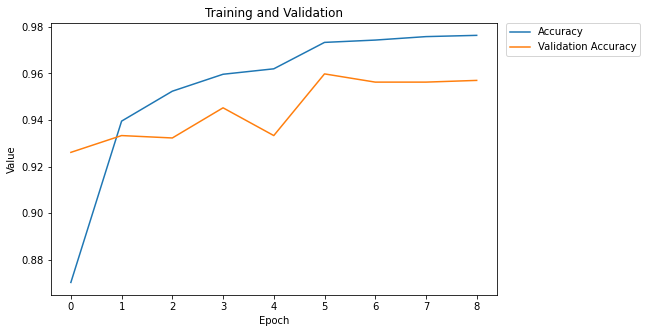

In [51]:
#Plot Metrics
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

plt.title('Training and Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

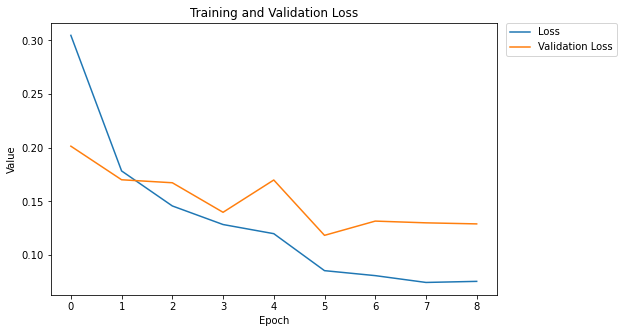

In [52]:
plt.figure(figsize = (8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training and Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [3]:
#LOAD MODEL
model = load_model("model_cnn2.h5")

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [5]:
model.evaluate(test_data)

2123/2123 [==============================] - 72s 33ms/step - loss: 0.0771 - Accuracy: 0.9712 - TP: 8343.0000 - FP: 242.0000 - TN: 8147.0000 - FN: 247.0000 - Precision: 0.9718 - Recall: 0.9712


[0.07713539153337479,
 0.9711996912956238,
 8343.0,
 242.0,
 8147.0,
 247.0,
 0.9718112945556641,
 0.9712456464767456]